In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.0


In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 503 kB 65.4 MB/s 
     |████████████████████████████████| 3.8 MB 34.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=231d539b1ab9fb3c99a92a422bcc0bb70f9a0b25aa1f4847fa40e9b5fe83bf52
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [ ]:
import tensorflow as tf

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

import lightgbm as lgb

import numpy as np

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.shape, test.shape

((1459, 11), (715, 10))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
train.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


In [ ]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [ ]:
traincopy = train.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


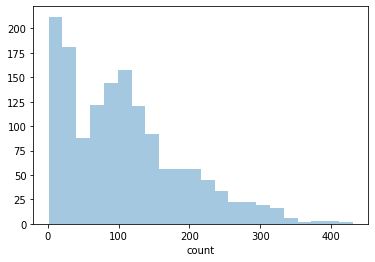

In [ ]:
sns.distplot(traincopy['count'], kde = False, bins = None)

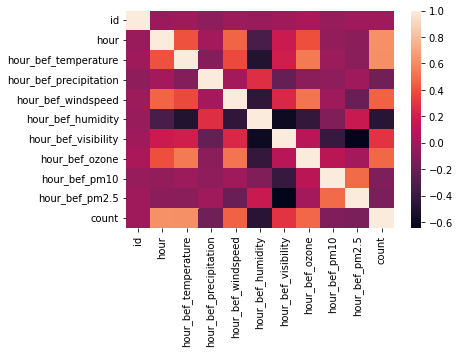

In [ ]:
sns.heatmap(traincopy.corr(), annot=False)

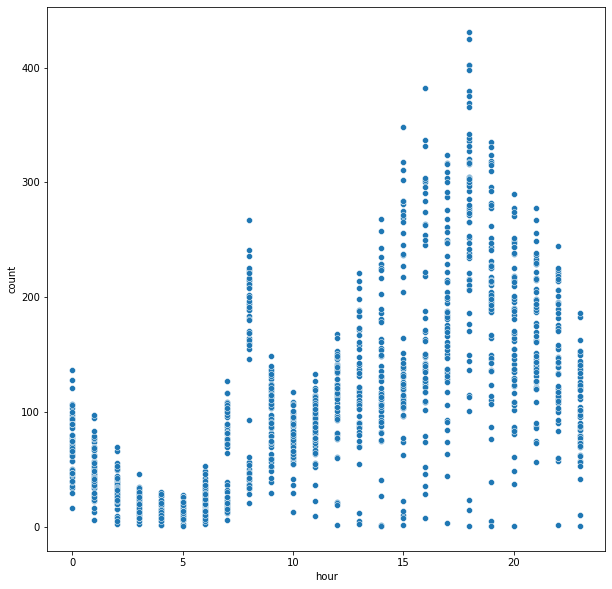

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data = traincopy, x='hour', y='count')

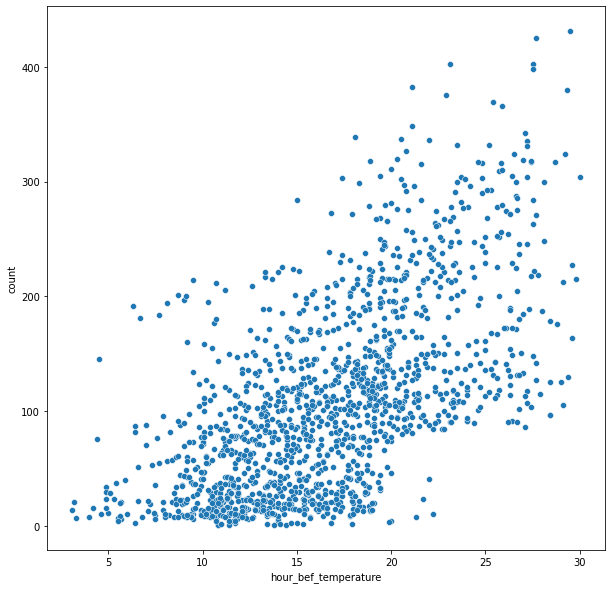

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data = traincopy, x='hour_bef_temperature', y='count')

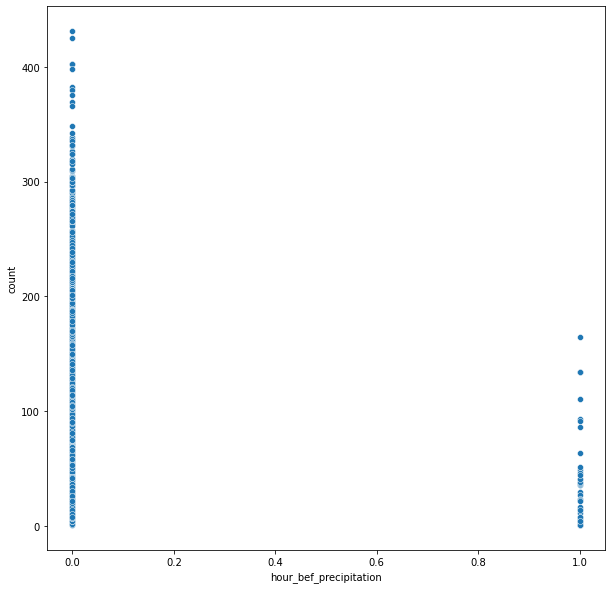

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data = traincopy, x='hour_bef_precipitation', y='count')

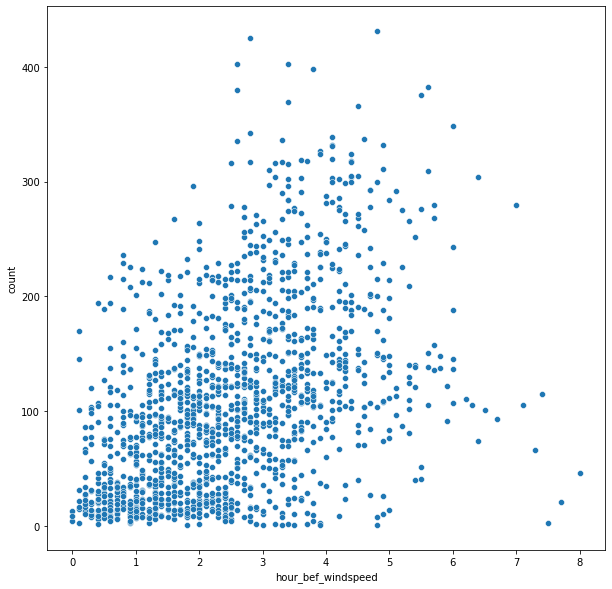

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data = traincopy, x='hour_bef_windspeed', y='count')

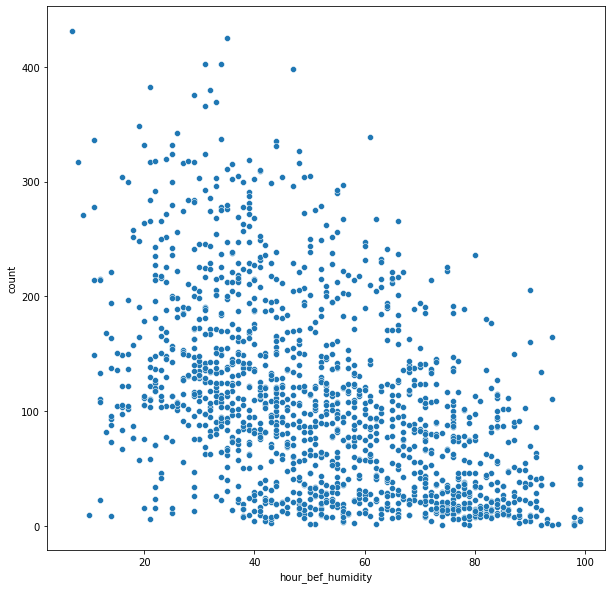

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data = traincopy, x='hour_bef_humidity', y='count')

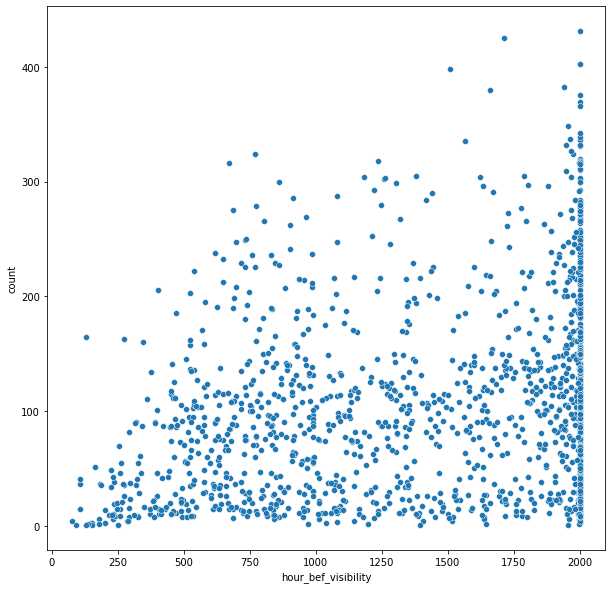

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data = traincopy, x='hour_bef_visibility', y='count')

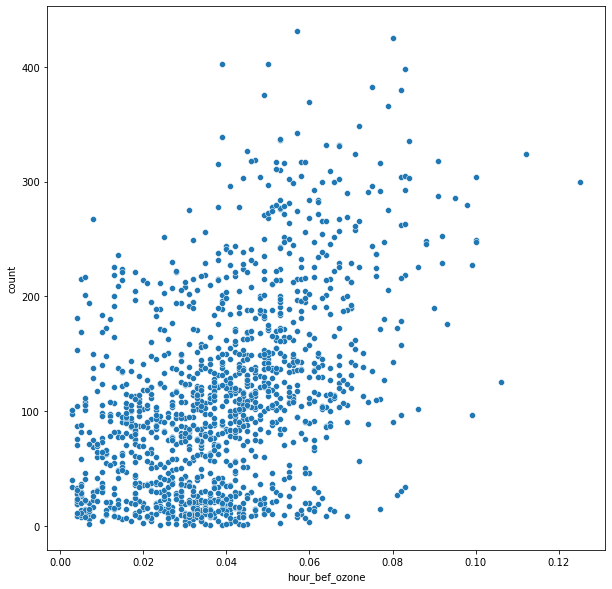

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(data = traincopy, x='hour_bef_ozone', y='count')

In [ ]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
#결측치는 precipitation 빼고는 다 평균치로 채워주겠습니다. 비는 안올 확률이 1년중에 높으니 0으로 채우겠습니다.

In [ ]:
train['hour_bef_precipitation'].fillna(0, inplace=True)
test['hour_bef_precipitation'].fillna(0, inplace=True)

In [ ]:
train_isna_sum = train.isna().sum()

In [ ]:
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [ ]:
na_columns = train_isna_sum[train_isna_sum != 0].index

In [ ]:
def fill_bicycle_na(df, column) :
    
    df[column] = df[column].fillna(value = df[column].mean())

In [ ]:
for col in na_columns:
    
    fill_bicycle_na(train, col)
    
    print(col, '결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [ ]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [ ]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     0
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [ ]:
test_isna_sum = test.isna().sum()

In [ ]:
test_isna_sum[test_isna_sum != 0].index

Index(['hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [ ]:
test_na_columns = test_isna_sum[test_isna_sum != 0].index

In [ ]:
for col in test_na_columns:

  fill_bicycle_na(test, col)

  print(col, '결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [ ]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

#이상치는 감지 건너뛰고 이상치 제거 IQR로 해볼게. 양극단 조금 제거하는 방법임.
#사용할 피쳐는 대충 hour, temperture, precipitation, windspeed, ozone. precipitation은 관계 없을리가 없어보여서 넣음.

#근데 이거는 내가 제거하길 원하는 데이터를 제거하는 모델이 아니라서 이상치 제거는 나중에 하는걸로 하고 일단은 학습으로 바로 넘어갈게요.

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

  # 함수 사용해서 이상치 값 삭제
oulier_idx = get_outlier(df=df, column='A', weight=1.5)
df.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
train.groupby(['hour'])['count'].mean()

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

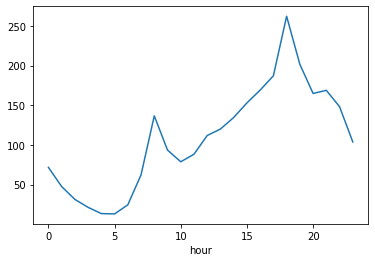

In [ ]:
train.groupby(['hour'])['count'].mean().plot()

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [ ]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_ozone']
target = ['count']

In [ ]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=777)

In [ ]:
params = {
    'learning_rate': [0.1, 0.01, 0.003],
    'min_child_samples': [20, 30]}

gs = GridSearchCV(estimator=model,
                 param_grid=params,
                  scoring= 'neg_mean_squared_error',
                  cv = k_fold)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_params_

{'learning_rate': 0.003, 'min_child_samples': 20}

In [ ]:
model = lgb.LGBMRegressor(random_state=777,n_estimators=3000, learning_rate=0.003, min_child_samples=20)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4083.73
[200]	valid_0's l2: 2967.9
[300]	valid_0's l2: 2377.57
[400]	valid_0's l2: 2086.28
[500]	valid_0's l2: 1951.79
[600]	valid_0's l2: 1872.59
[700]	valid_0's l2: 1824.36
[800]	valid_0's l2: 1822.87
Early stopping, best iteration is:
[731]	valid_0's l2: 1817.57
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4760.41
[200]	valid_0's l2: 3530.06
[300]	valid_0's l2: 2830.39
[400]	valid_0's l2: 2433.59
[500]	valid_0's l2: 2208.57
[600]	valid_0's l2: 2090.54
[700]	valid_0's l2: 2006.94
[800]	valid_0's l2: 1943.01
[900]	valid_0's l2: 1893.05
[1000]	valid_0's l2: 1885.88
Early stopping, best iteration is:
[970]	valid_0's l2: 1884.8
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4686.47
[200]	valid_0's l2: 3378.29
[300]	valid_0's l2: 2607.65
[400]	valid_0's l2: 2165
[500]	valid_0's l2: 1912.41
[600]	valid_0's l2: 1777.11
[700]	valid_0's l

In [ ]:
preds = []

for model in models:
    preds.append(model.predict(X_test))

In [ ]:
submission = pd.read_csv("/content/submission.csv")

In [ ]:
gslgbm = submission.copy()

In [ ]:
gslgbm['count'] = np.mean(preds, axis=0)
gslgbm

,id,count
0,0,84.135464
1,1,219.634698
2,2,112.071811
3,4,35.221848
4,5,136.383148
...,...,...
710,2148,65.160576
711,2149,64.341526
712,2165,108.541851
713,2166,129.550244


In [ ]:
gslgbm.to_csv('gslgbm.csv', index=False)